In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 


## Loading the dataset 

In [2]:
df=pd.read_csv('vgsales.csv')


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data cleaning and preprocesing 

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.columns 

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.shape

(16598, 11)

## Relational graph 

### Scatter plot 

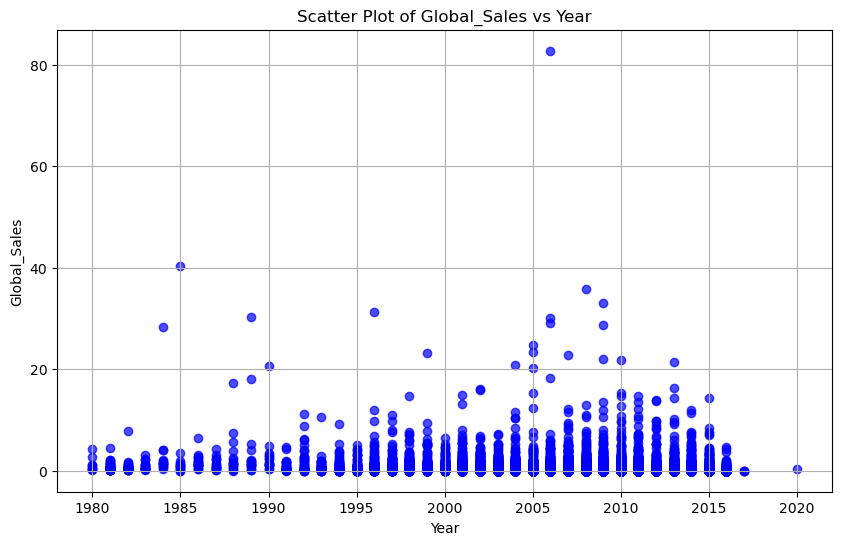

In [8]:

def create_xy_scatter_plot(df, x_column, y_column):
    """
    Create a scatter plot with specified x and y columns.

    Args:
    - df: DataFrame containing the video games dataset.
    - x_column: Name of the column to use for the x-axis.
    - y_column: Name of the column to use for the y-axis.

    Returns:
    - None (displays the scatter plot)
    """
    # Check if the columns exist in the DataFrame
    if x_column not in df.columns or y_column not in df.columns:
        print(f"Error: One or both of the specified columns not found in the dataset.")
        return

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], color='blue', alpha=0.7)
    plt.title(f'Scatter Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Specify the columns for the scatter plot (e.g., 'Year' vs 'Global_Sales')
x_column = 'Year'
y_column = 'Global_Sales'

# Call the function to create and display the scatter plot
create_xy_scatter_plot(df, x_column, y_column)


### Line graph 

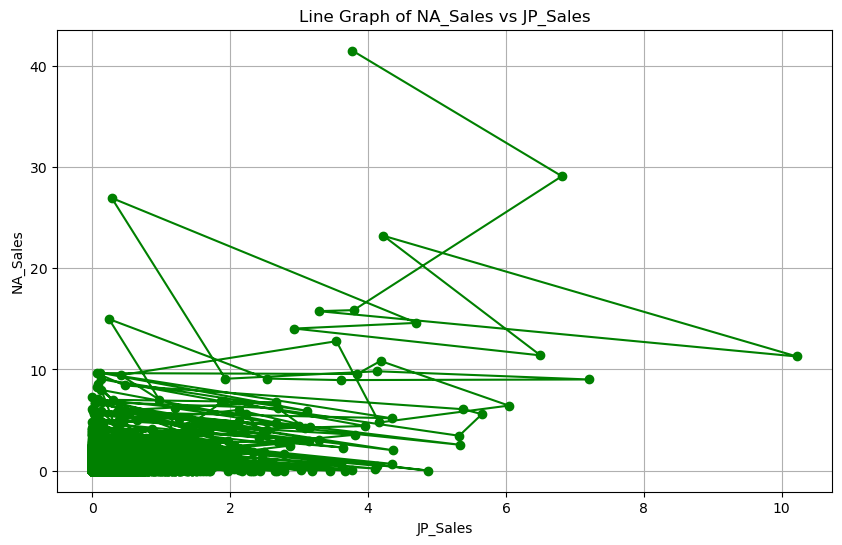

In [9]:
def create_line_graph(df, x_column, y_column, line_color='blue'):
    """
    Create a line graph with specified x and y columns.

    Args:
    - df: DataFrame containing the video games dataset.
    - x_column: Name of the column to use for the x-axis.
    - y_column: Name of the column to use for the y-axis.
    - line_color: Color of the line (default is 'blue').

    Returns:
    - None (displays the line graph)
    """
    # Check if the columns exist in the DataFrame
    if x_column not in df.columns or y_column not in df.columns:
        print(f"Error: One or both of the specified columns not found in the dataset.")
        return

    # Create the line graph with specified color
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_column], df[y_column], color=line_color, marker='o')
    plt.title(f'Line Graph of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Specify the columns for the line graph (e.g., 'JP_Sales' vs 'NA_Sales')
x_column_line = 'JP_Sales'  
y_column_line = 'NA_Sales'  

# Specify the color for the line graph
line_color = 'green'  # For example, change to 'green'

# Call the function to create and display the line graph with the specified color
create_line_graph(df, x_column_line, y_column_line, line_color)


## Categoral graph 

### bar chart 

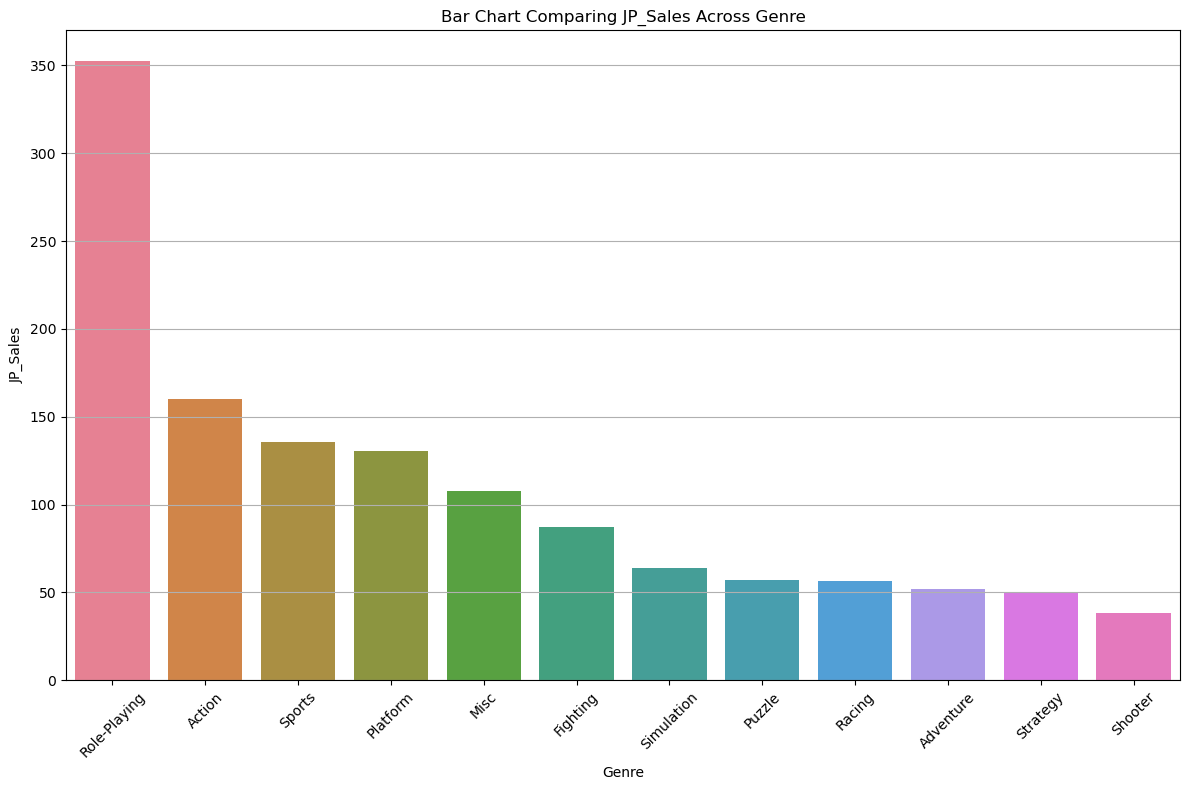

In [10]:
import seaborn as sns

def create_bar_chart(df, category_column, value_column):
    """
    Create a bar chart to compare multiple categories using Seaborn.

    Args:
    - df: DataFrame containing the data.
    - category_column: Name of the column containing the categories.
    - value_column: Name of the column containing the values to be compared.

    Returns:
    - None (displays the bar chart)
    """
    # Check if the columns exist in the DataFrame
    if category_column not in df.columns or value_column not in df.columns:
        print(f"Error: One or both of the specified columns not found in the dataset.")
        return

    # Group the data by the category column and calculate the sum of values
    grouped_data = df.groupby(category_column)[value_column].sum().reset_index()

    # Sort the data by the values in descending order for better visualization
    grouped_data = grouped_data.sort_values(by=value_column, ascending=False)

    # Define a custom color palette for the bars
    custom_palette = sns.color_palette("husl", len(grouped_data))

    # Create the bar chart using Seaborn with the custom color palette
    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_column, y=value_column, data=grouped_data, palette=custom_palette)
    plt.title(f'Bar Chart Comparing {value_column} Across {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')  # Show gridlines only on y-axis
    plt.tight_layout()  # Adjust layout to prevent cropping of labels
    plt.show()


# Specify the columns for the bar chart
category_column = 'Genre'  # Categorical column for comparison (e.g., 'Genre')
value_column = 'JP_Sales'  # Numeric column to be compared across categories (e.g., 'JP_Sales')

# Call the function to create and display the bar chart
create_bar_chart(df, category_column, value_column)


### pie chart 

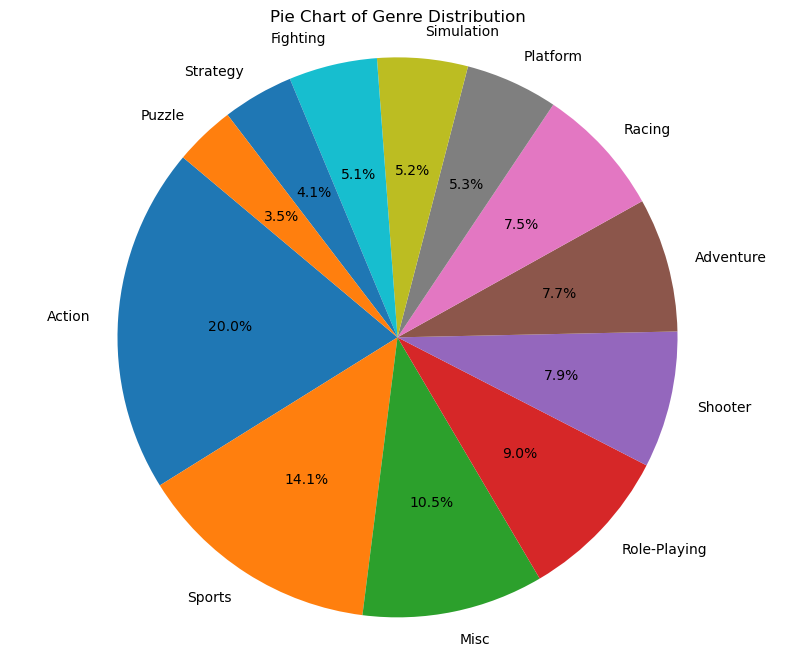

In [11]:
def create_pie_chart(df, category_column):
    """
    Create a pie chart to visualize the distribution of categories.

    Args:
    - df: DataFrame containing the data.
    - category_column: Name of the column containing the categories.

    Returns:
    - None (displays the pie chart)
    """
    # Check if the category column exists in the DataFrame
    if category_column not in df.columns:
        print(f"Error: The specified column '{category_column}' not found in the dataset.")
        return

    # Count the frequency of each category
    category_counts = df[category_column].value_counts()

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {category_column} Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Specify the column for the pie chart
category_column = 'Genre'  # Categorical column to visualize the distribution (e.g., 'Genre')

# Call the function to create and display the pie chart
create_pie_chart(df, category_column)


## Statistical graph 

### Box plot 

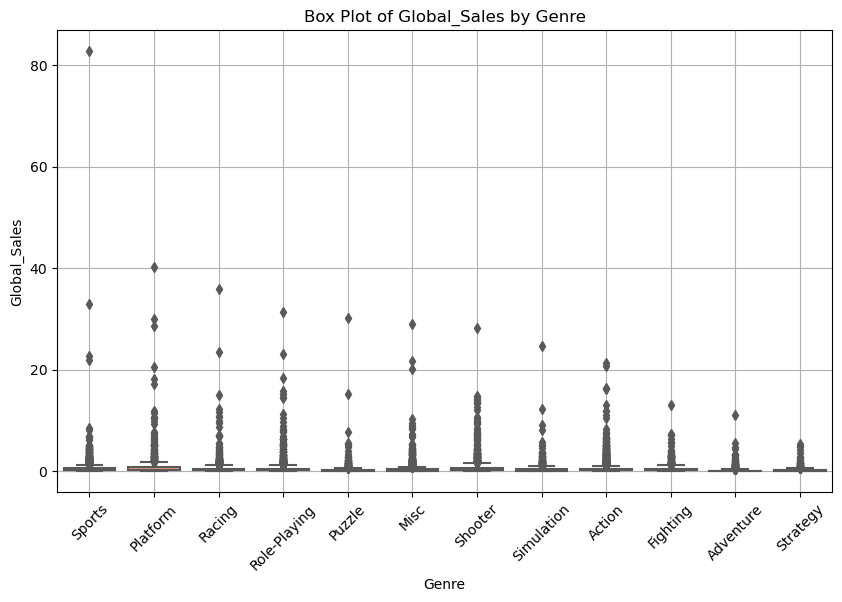

In [12]:
import seaborn as sns

def create_box_plot(df, category_column, numeric_column):
    """
    Create a box plot to visualize the statistical relationship between a categorical and numeric column.

    Args:
    - df: DataFrame containing the data.
    - category_column: Name of the categorical column.
    - numeric_column: Name of the numeric column.

    Returns:
    - None (displays the box plot)
    """
    # Check if the columns exist in the DataFrame
    if category_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or both of the specified columns not found in the dataset.")
        return

    # Define a custom color palette
    custom_palette = sns.color_palette("Set2")

    # Create the box plot using Seaborn with the custom color palette
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category_column, y=numeric_column, data=df, palette=custom_palette)
    plt.title(f'Box Plot of {numeric_column} by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

# Specify the columns for the box plot
category_column = 'Genre'  # Categorical column for comparison (e.g., 'Genre')
numeric_column = 'Global_Sales'  # Numeric column to visualize the distribution (e.g., 'Global_Sales')

# Call the function to create and display the box plot
create_box_plot(df, category_column, numeric_column)


###  Violin 

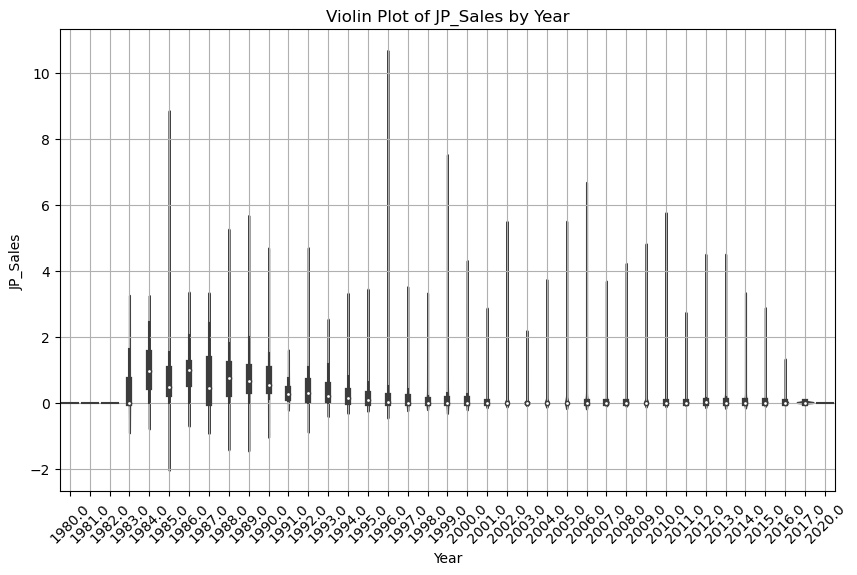

In [13]:
import seaborn as sns

def create_violin_plot(df, category_column, numeric_column):
    """
    Create a violin plot to visualize the distribution of a numeric column across categories.

    Args:
    - df: DataFrame containing the data.
    - category_column: Name of the categorical column.
    - numeric_column: Name of the numeric column.

    Returns:
    - None (displays the violin plot)
    """
    # Check if the columns exist in the DataFrame
    if category_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or both of the specified columns not found in the dataset.")
        return

    # Create the violin plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=category_column, y=numeric_column, data=df, palette='muted')
    plt.title(f'Violin Plot of {numeric_column} by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

# Specify the columns for the violin plot
category_column = 'Year'  # Categorical column for comparison (e.g., 'Year')
numeric_column = 'JP_Sales'  # Numeric column to visualize the distribution (e.g., 'JP_Sales')

# Call the function to create and display the violin plot
create_violin_plot(df, category_column, numeric_column)


## confusion matrix  

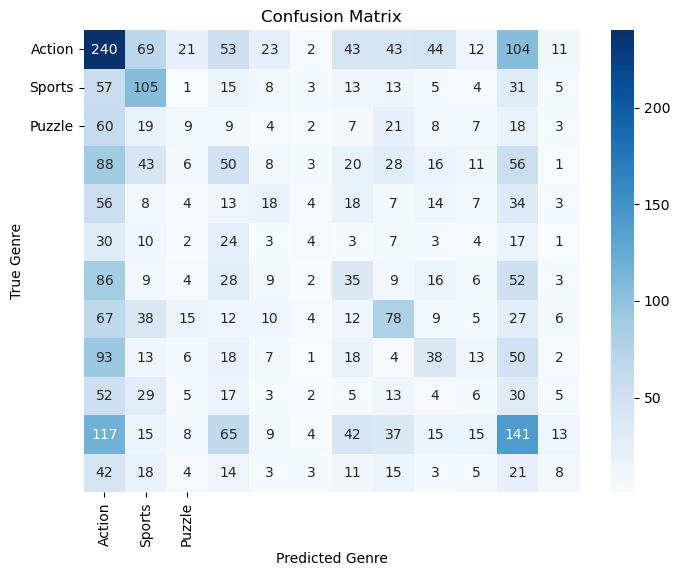

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
def create_confusion_matrix(df):
    """
    Load the video games dataset, train a RandomForestClassifier, and generate a confusion matrix.

    Args:
    - df: DataFrame containing the video games dataset.

    Returns:
    - None (displays the confusion matrix)
    """
    # Define the features and target variable
    X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    y = df['Genre']  # Assuming 'Genre' is the target variable to be predicted

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestClassifier (or any other classifier) on the training data
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict the genre labels for the testing data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Action', 'Sports', 'Puzzle'], yticklabels=['Action', 'Sports', 'Puzzle'])
    plt.xlabel('Predicted Genre')
    plt.ylabel('True Genre')
    plt.title('Confusion Matrix')
    plt.show()


# Call the function to create and display the confusion matrix
create_confusion_matrix(df)

## Data analysis 

Summary Statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040

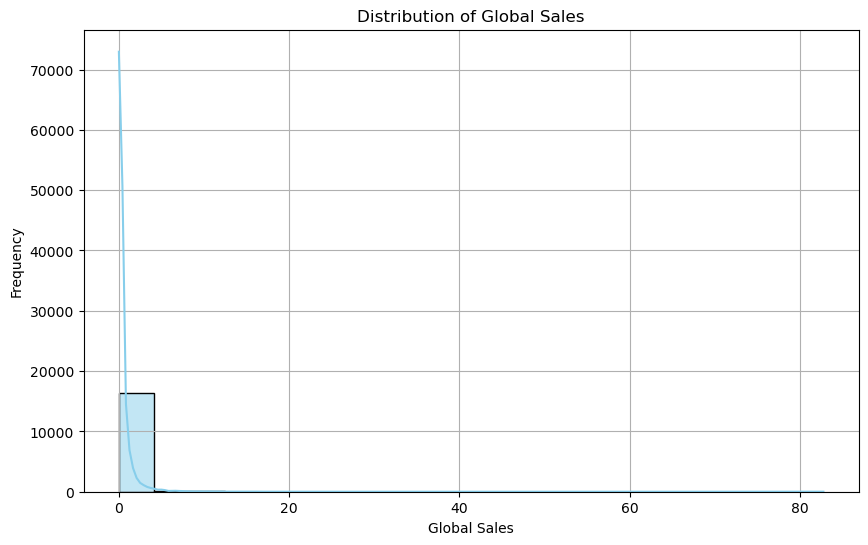

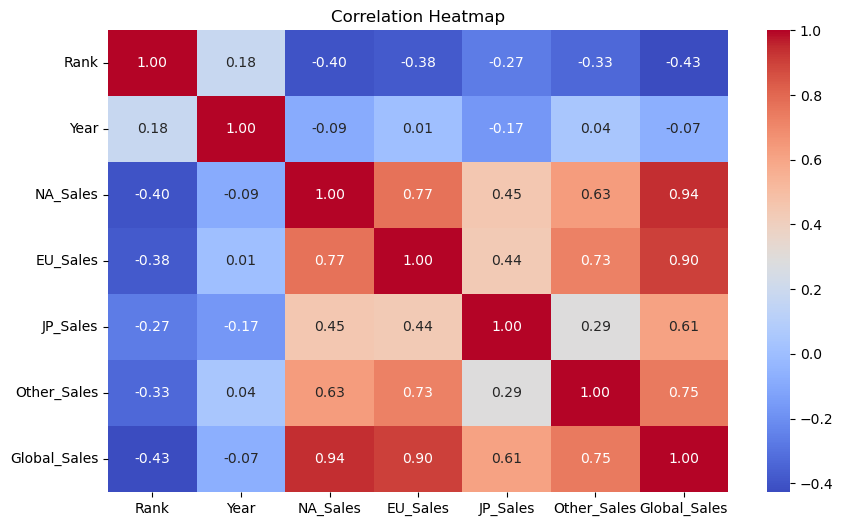

In [15]:

def perform_data_analysis(df):
    """
    Perform data analysis on the video games dataset.

    Args:
    - df: DataFrame containing the video games dataset.

    Returns:
    - None
    """
    # Summary statistics
    summary_stats = df.describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Distribution of global sales
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Global_Sales'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Global Sales')
    plt.xlabel('Global Sales')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Select numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include='number')

    # Correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()



# Call the function to perform data analysis
perform_data_analysis(df)


## statistical analysis 

Summary Statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040

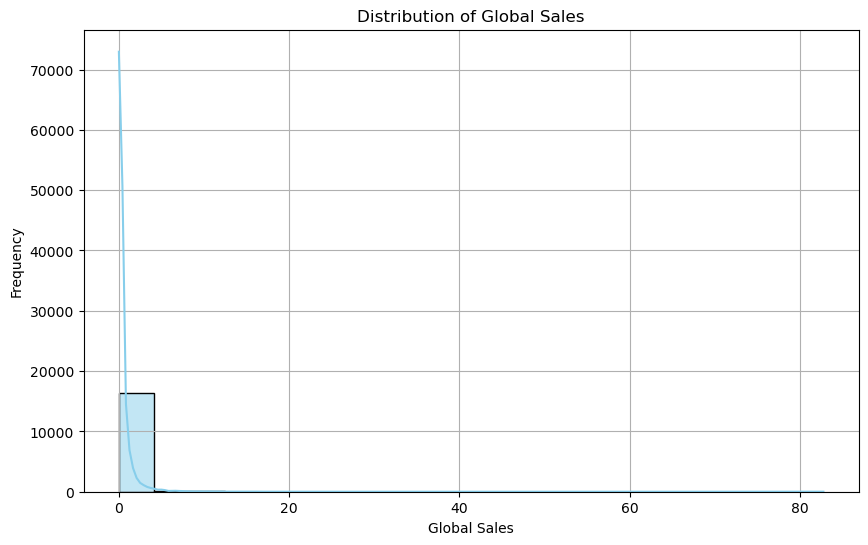


Correlation Matrix:
                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  

Major Statistical Moments:
Column: Rank
Mean: 8300.61
Median: 8300.50
Standard Deviation: 4791.85
Skewness: 0.00


In [16]:
def perform_data_analysis(df):
    """
    Perform data analysis on the video games dataset.

    Args:
    - df: DataFrame containing the video games dataset.

    Returns:
    - None
    """
    # Summary statistics
    summary_stats = df.describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Distribution of global sales
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Global_Sales'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Global Sales')
    plt.xlabel('Global Sales')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Select numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include='number')

    # Correlation matrix
    correlation_matrix = numeric_df.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Major moments
    print("\nMajor Statistical Moments:")
    for column in numeric_df.columns:
        mean = numeric_df[column].mean()
        median = numeric_df[column].median()
        std_dev = numeric_df[column].std()
        skewness = numeric_df[column].skew()
        kurtosis = numeric_df[column].kurtosis()
        print(f"Column: {column}")
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"Skewness: {skewness:.2f}")
        print(f"Kurtosis: {kurtosis:.2f}")
        print()

# Call the function to perform data analysis
perform_data_analysis(df)


## Clustering 

In [17]:
from sklearn.cluster import KMeans

def perform_clustering(df, n_clusters=3):
    """
    Perform KMeans clustering on the numeric columns of the video games dataset.

    Args:
    - df: DataFrame containing the video games dataset.
    - n_clusters: Number of clusters to form.

    Returns:
    - labels: Array of cluster labels for each data point.
    """
    # Select numeric columns for clustering
    numeric_df = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

    # Initialize KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit KMeans model to the data
    kmeans.fit(numeric_df)

    # Get cluster labels for each data point
    labels = kmeans.labels_

    return labels

# Perform clustering
cluster_labels = perform_clustering(df, n_clusters=3)

# Print the first few cluster labels
print("Cluster Labels:")
print(cluster_labels[:10])


C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels:
[1 1 1 1 1 1 1 1 1 1]


In [18]:
df=df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [19]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Fitting 

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

def perform_model_fitting(df):
    """
    Fit a RandomForestRegressor model on the video games dataset to predict 'NA_Sales'.

    Args:
    - df: DataFrame containing the video games dataset.

    Returns:
    - rmse: Root Mean Squared Error of the fitted model.
    """
    # Fill missing values in numeric columns with mean
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    # Apply label encoding to categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Select features and target variable
    X = df.drop(columns=['NA_Sales'])
    y = df['NA_Sales']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse


# Perform model fitting
rmse = perform_model_fitting(df)

# Print the Root Mean Squared Error
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.47097835993412196


## silhouette  

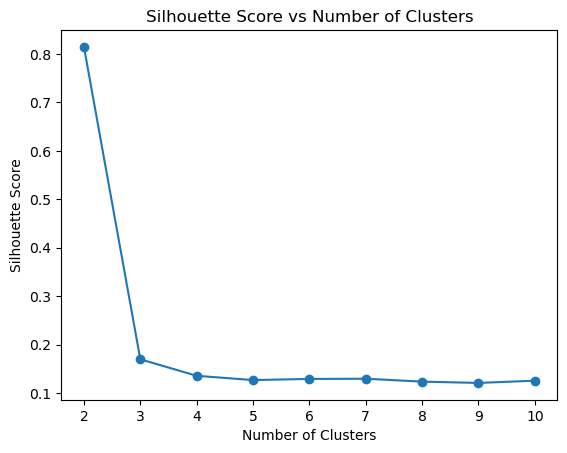

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

def perform_clustering(df, n_clusters):
    """
    Perform KMeans clustering on the dataset.

    Args:
    - df: DataFrame containing the dataset.
    - n_clusters: Number of clusters to create.

    Returns:
    - labels: Cluster labels for each data point.
    - silhouette_avg: Silhouette score for the clustering.
    """
    # Normalize and scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Suppress future warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, labels)

    return labels, silhouette_avg



# Choose the range of clusters to evaluate
min_clusters = 2
max_clusters = 10

# Store silhouette scores for each number of clusters
silhouette_scores = []

# Perform clustering for each number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    labels, silhouette_avg = perform_clustering(df, n_clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find the optimal number of clusters
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


## Kmean clustering 

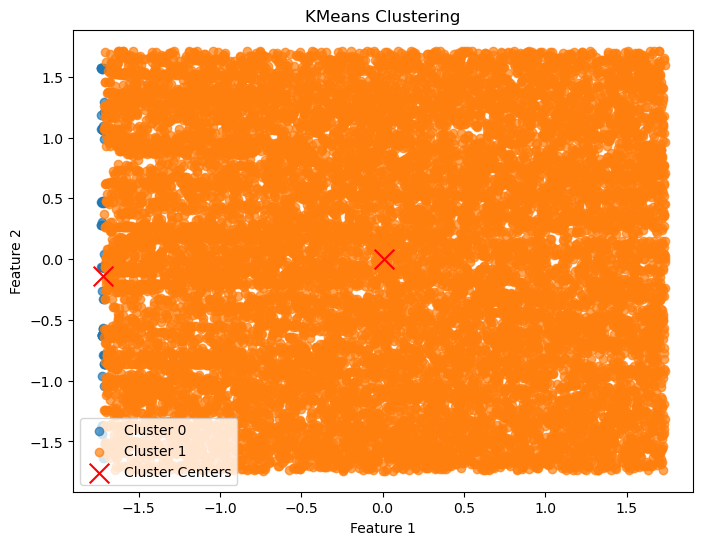

In [22]:

def preprocess_data(df):
    # Normalize and scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

def find_optimal_clusters(data, max_clusters=10):
    # Calculate silhouette score for different number of clusters
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Find optimal number of clusters using silhouette score
    optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to start from 2 clusters
    return optimal_clusters

def perform_clustering(data, n_clusters):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

def plot_clusters(data, cluster_labels, cluster_centers):
    # Plot clusters with colored groups and labeled cluster centers
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(cluster_labels))):
        plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1], label=f'Cluster {i}', alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()


# Preprocess the data
scaled_data = preprocess_data(df)

# Find the optimal number of clusters
optimal_clusters = find_optimal_clusters(scaled_data)

# Perform clustering with optimal number of clusters
cluster_labels, cluster_centers = perform_clustering(scaled_data, optimal_clusters)

# Plot clusters
plot_clusters(scaled_data, cluster_labels, cluster_centers)


## linear regression fitting 

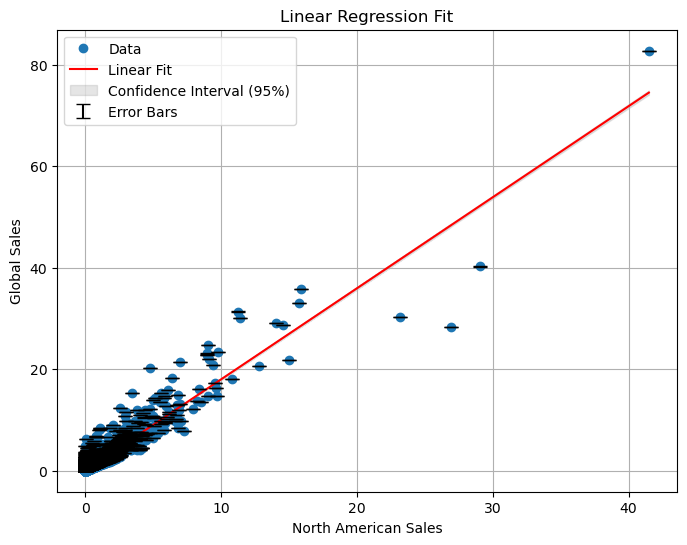

In [23]:
from scipy import stats

def perform_linear_regression(x, y):
    """
    Perform linear regression on the given data.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.

    Returns:
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - r_value: Correlation coefficient.
    - p_value: Two-tailed p-value for a hypothesis test whose null hypothesis is that the slope is zero.
    - std_err: Standard error of the estimate.
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, intercept, r_value, p_value, std_err

def plot_linear_fit(x, y, slope, intercept, r_value, p_value, std_err):
    """
    Plot the linear fit along with confidence intervals and error bars.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - r_value: Correlation coefficient.
    - p_value: Two-tailed p-value for a hypothesis test whose null hypothesis is that the slope is zero.
    - std_err: Standard error of the estimate.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, slope * x + intercept, 'r', label='Linear Fit')
    
    # Confidence interval
    confidence = 0.95
    n = len(x)
    t = stats.t.ppf(1 - (1 - confidence) / 2, n - 2)
    y_pred = slope * x + intercept
    s_err = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
    ci = t * s_err * np.sqrt(1 / n + (x - np.mean(x)) ** 2 / np.sum((x - np.mean(x)) ** 2))
    plt.fill_between(x, slope * x + intercept - ci, slope * x + intercept + ci, color='gray', alpha=0.2, label=f'Confidence Interval ({int(confidence*100)}%)')

    # Error bars
    plt.errorbar(x, y, yerr=std_err, fmt='none', ecolor='black', capsize=5, label='Error Bars')
    
    plt.xlabel('North American Sales')
    plt.ylabel('Global Sales')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Choose independent and dependent variables
x = df['NA_Sales']
y = df['Global_Sales']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = perform_linear_regression(x, y)

# Plot linear fit with confidence intervals and error bars
plot_linear_fit(x, y, slope, intercept, r_value, p_value, std_err)


## performance of linear regression fitting (prediction with uncertainty)

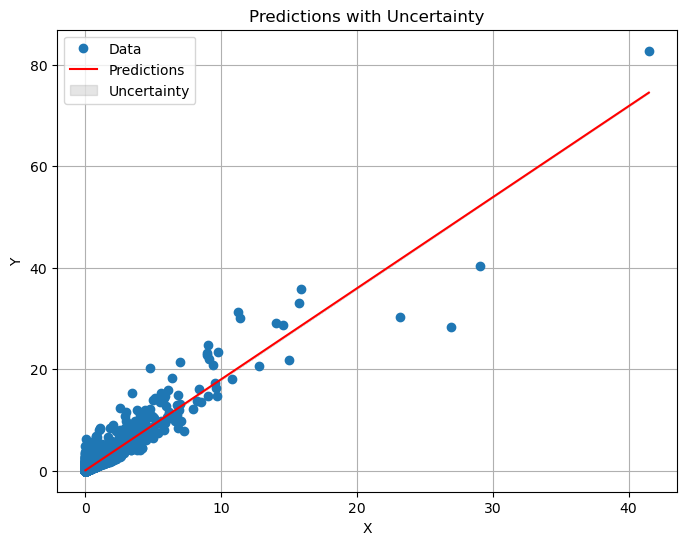

In [24]:
def perform_linear_regression(x, y):
    """
    Perform linear regression on the given data.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.

    Returns:
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - r_value: Correlation coefficient.
    - p_value: Two-tailed p-value for a hypothesis test whose null hypothesis is that the slope is zero.
    - std_err: Standard error of the estimate.
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, intercept, r_value, p_value, std_err

def generate_predictions(x, slope, intercept):
    """
    Generate predictions based on linear regression.

    Args:
    - x: Independent variable data.
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.

    Returns:
    - predictions: Predicted values.
    """
    predictions = slope * x + intercept
    return predictions

def plot_predictions_with_uncertainty(x, y, slope, intercept, std_err):
    """
    Plot predictions along with associated uncertainties.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - std_err: Standard error of the estimate.
    """
    # Generate predictions
    predictions = generate_predictions(x, slope, intercept)

    # Plot predictions with associated uncertainties
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, predictions, 'r', label='Predictions')
    plt.fill_between(x, predictions - std_err, predictions + std_err, color='gray', alpha=0.2, label='Uncertainty')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Predictions with Uncertainty')
    plt.legend()
    plt.grid(True)
    plt.show()


# Choose independent and dependent variables
x = df['NA_Sales']
y = df['Global_Sales']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = perform_linear_regression(x, y)

# Plot predictions with associated uncertainties
plot_predictions_with_uncertainty(x, y, slope, intercept, std_err)


## clustering prediction 

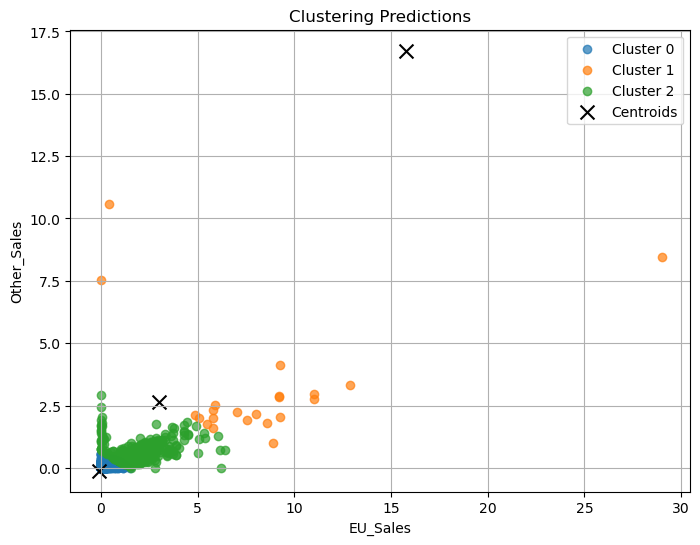

In [25]:
def perform_clustering(data, n_clusters=3):
    """
    Perform K-means clustering on the given data.

    Args:
    - data: Input data for clustering.
    - n_clusters: Number of clusters.

    Returns:
    - labels: Predicted cluster labels.
    - centroids: Cluster centroids.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    centroids = kmeans.cluster_centers_

    return labels, centroids

def visualize_clusters(data, labels, centroids):
    """
    Visualize the clustering results.

    Args:
    - data: Input data.
    - labels: Predicted cluster labels.
    - centroids: Cluster centroids.
    """
    plt.figure(figsize=(8, 6))

    # Plot each cluster
    for cluster in range(len(centroids)):
        plt.scatter(data[labels == cluster][:, 0], data[labels == cluster][:, 1], label=f'Cluster {cluster}', alpha=0.7)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

    plt.xlabel('EU_Sales')
    plt.ylabel('Other_Sales')
    plt.title('Clustering Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()


# Select features for clustering (example: EU_Sales and Other_Sales)
data = df[['EU_Sales', 'Other_Sales']].values

# Perform clustering
labels, centroids = perform_clustering(data)

# Visualize clustering predictions
visualize_clusters(data, labels, centroids)


## calculating silhouette score

In [26]:
def calculate_silhouette_score(data, n_clusters_range=(2, 6)):
    """
    Calculate silhouette score for different numbers of clusters.

    Args:
    - data (DataFrame): Input data for clustering.
    - n_clusters_range (tuple): Range of number of clusters to try.

    Returns:
    None
    """
    X = data.values  # Extract features from the dataset

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for n_clusters in range(*n_clusters_range):  # Try different number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.3f}")



# Select features for clustering
features = df[['NA_Sales', 'Global_Sales']]

# Calculate silhouette score for different numbers of clusters
calculate_silhouette_score(features)
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def calculate_silhouette_score(data, n_clusters_range=(2, 6)):
    """
    Calculate silhouette score for different numbers of clusters.

    Args:
    - data (DataFrame): Input data for clustering.
    - n_clusters_range (tuple): Range of number of clusters to try.

    Returns:
    None
    """
    X = data.values  # Extract features from the dataset

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for n_clusters in range(*n_clusters_range):  # Try different number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.3f}")



# Select features for clustering
features = df[['NA_Sales', 'Global_Sales']]

# Calculate silhouette score for different numbers of clusters
calculate_silhouette_score(features)


For n_clusters = 2, the average silhouette score is: 0.953
For n_clusters = 3, the average silhouette score is: 0.865
For n_clusters = 4, the average silhouette score is: 0.829
For n_clusters = 5, the average silhouette score is: 0.783
For n_clusters = 2, the average silhouette score is: 0.953
For n_clusters = 3, the average silhouette score is: 0.865
For n_clusters = 4, the average silhouette score is: 0.829
For n_clusters = 5, the average silhouette score is: 0.783


## exponential and polynomial fitting 

C:\Users\PAVILION USER\AppData\Local\Temp\ipykernel_12844\2771322421.py:19: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


Optimal parameters not found. Try increasing the maxfev value.


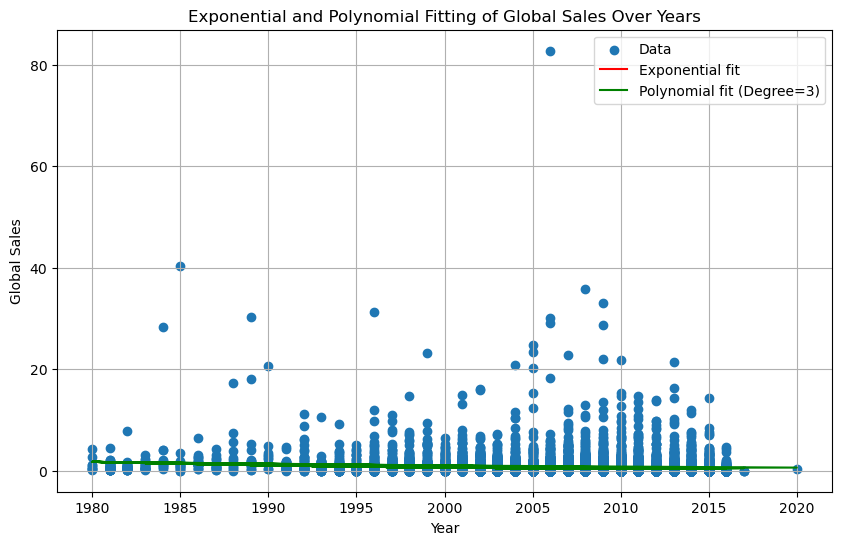

In [27]:

from scipy.optimize import curve_fit

def exponential_fit(x, y):
    """
    Perform exponential fitting on the given data.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - popt (array): Optimal parameters for the exponential fit.
    """
    # Define exponential function
    def exponential_func(x, a, b):
        return a * np.exp(b * x)

    try:
        # Fit the data to the exponential function
        popt, pcov = curve_fit(exponential_func, x, y, maxfev=10000)
        return popt
    except RuntimeError:
        print("Optimal parameters not found. Try increasing the maxfev value.")
        return [np.nan, np.nan]  # Return NaN values if fitting fails

def polynomial_fit(x, y, degree=3):
    """
    Perform polynomial fitting on the given data.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.
    - degree (int): Degree of the polynomial.

    Returns:
    - coefficients (array): Coefficients of the polynomial fit.
    """
    # Fit the data to a polynomial function
    coefficients = np.polyfit(x, y, deg=degree)
    return coefficients


# Select features for fitting
x = df['Year'].values
y = df['Global_Sales'].values

# Perform exponential fitting
exp_params = exponential_fit(x, y)

# Perform polynomial fitting
poly_coefficients = polynomial_fit(x, y, degree=3)

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, exp_params[0] * np.exp(exp_params[1] * x), color='red', label='Exponential fit')
plt.plot(x, np.poly1d(poly_coefficients)(x), color='green', label='Polynomial fit (Degree=3)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Exponential and Polynomial Fitting of Global Sales Over Years')
plt.legend()
plt.grid(True)
plt.show()
